# Training models with ai4i2020 dataset
- pre processing the dataset
    - split train data and test data (80: 20)
    - normalize the data, reshape the data
    - split train data and validation data (80:20)
- train models and store the best model
    - CNN
    - RNN
    - LSTM
    - GRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive

/content/drive


In [ ]:
cd /content/drive/My\ Drive/Colab\ Notebooks/summer_coop

/content/drive/My Drive/Colab Notebooks/summer_coop


In [ ]:
ls

 ai4i2020/                    pronto/
 cluster_fruit.ipynb          RNN_IMDB.ipynb
 Conv2D.ipynb                 SoftEnsemble.ipynb
 fault_tolerant_nasa/         softensemble.py
 FordA/                      'SVM sample code.ipynb'
'get data from web.ipynb'     training_model_ai4i.ipynb
'HTM implement.ipynb'         training_model_FordA.ipynb
'HTM install.ipynb'           training_model_pronto.ipynb
'HTM install success.ipynb'  'Voted Ensemble selection sample code .ipynb'
 LSTM-IMDB.ipynb


## Read csv file
- make dictionary for column name for convinience
    - ex. 'UDI': 0, 'Product ID': 1

In [ ]:
import pandas as pd
ai4i_df = pd.read_csv('./ai4i2020/ai4i2020.csv')
print(ai4i_df.columns)
# make dict of column name
ai4i_col = {}
for i in range(len(ai4i_df.columns)):
    ai4i_col[ai4i_df.columns[i]] = i 
print(ai4i_col)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
{'UDI': 0, 'Product ID': 1, 'Type': 2, 'Air temperature [K]': 3, 'Process temperature [K]': 4, 'Rotational speed [rpm]': 5, 'Torque [Nm]': 6, 'Tool wear [min]': 7, 'Machine failure': 8, 'TWF': 9, 'HDF': 10, 'PWF': 11, 'OSF': 12, 'RNF': 13}


## Binary Classification
### Extract features and class
- features: Air temperature, Process temeprature, Rotatoinial speed, Torque, Tool wear
- class: machine failure

In [ ]:
ai4i_arr = ai4i_df.to_numpy()
input_arr = ai4i_arr[:, ai4i_col['Air temperature [K]']:ai4i_col['Machine failure']]
target_arr = ai4i_arr[:, ai4i_col['Machine failure']]

In [ ]:
print(input_arr.shape, target_arr.shape)

(10000, 5) (10000,)


### Normalization the data

In [ ]:
import numpy as np

mean = np.mean(input_arr, axis = 0)
std = np.std(np.array(input_arr, dtype = np.float32), axis = 0)

input_arr = (input_arr - mean) / std

### Split train data and test data
- feature: (10000, 5) -> (8000, 5), (2000, 5)
- class: (10000,) -> (8000,), (2000,)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input_arr, target_arr, stratify = target_arr, test_size = 0.2)

In [ ]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


### Split train data and validation data
- change data type to np data type
- reshape train data: 2 dim(8000, 5) -> 3 dim (8000, 5, 1)
- split the data
    - train : validation = 80: 20

In [ ]:
train_input = np.array(train_input, dtype = np.float32)
train_target = np.array(train_target, dtype = np.int)
train_input = train_input.reshape(-1, 5, 1)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, stratify = train_target)

In [ ]:
print(train_input.shape)

(6400, 5, 1)


### Training model


#### CNN

In [ ]:
from tensorflow import keras

cnn = keras.Sequential()
cnn.add(keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu', padding = 'same', input_shape = (5, 1)))
cnn.add(keras.layers.MaxPooling1D(pool_size = 2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation = 'relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(keras.layers.Dense(1, activation = 'sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 6,697
Trainable params: 6,697
Non-trainable params: 0
______________________________________________________

In [ ]:
cd ./ai4i2020

/content/drive/My Drive/Colab Notebooks/summer_coop/ai4i2020


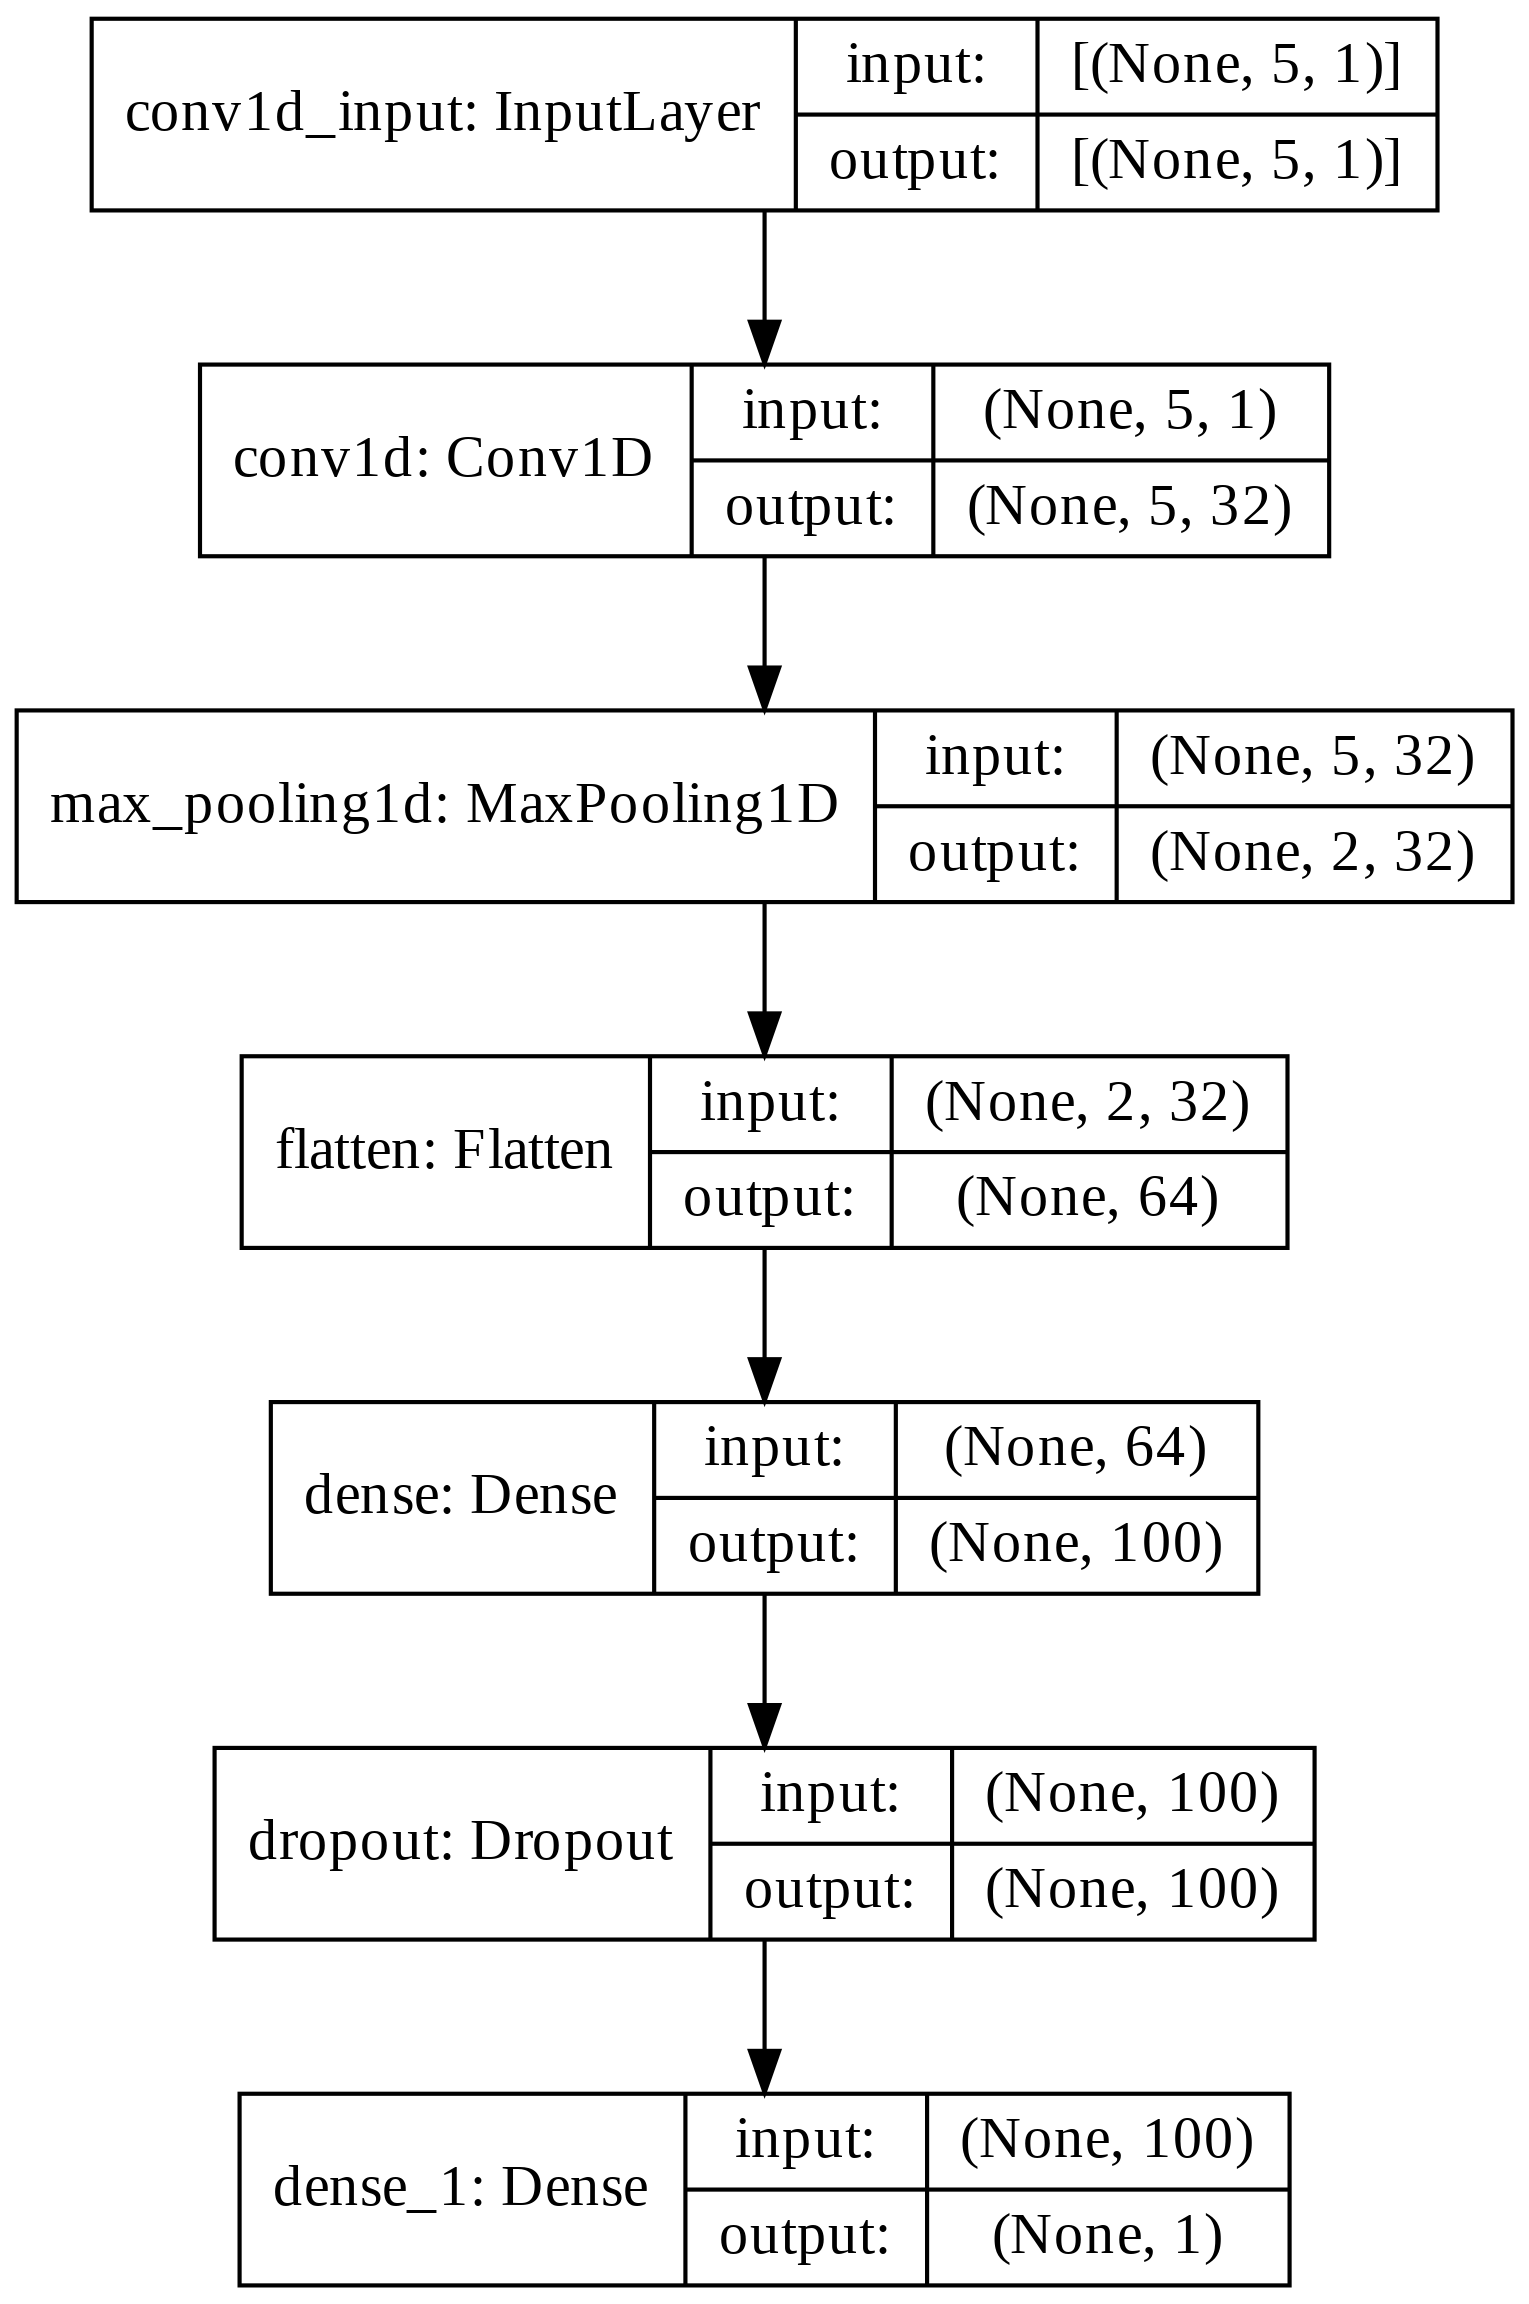

In [ ]:
keras.utils.plot_model(cnn, show_shapes = True, dpi = 300, to_file = './cnn-architecture.png')

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = cnn.fit(train_input, train_target, epochs = 20, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
200/200 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9527 - val_loss: 0.1431 - val_accuracy: 0.9663
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9666 - val_loss: 0.1140 - val_accuracy: 0.9675
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9683 - val_loss: 0.1068 - val_accuracy: 0.9694
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9700 - val_loss: 0.1054 - val_accuracy: 0.9681
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9694 - val_loss: 0.1006 - val_accuracy: 0.9675
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9678 - val_loss: 0.0978 - val_accuracy: 0.9663
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9717 - val_loss: 0.0956 - val_accuracy: 0.9688
Epoch 

In [ ]:
cnn.evaluate(val_input, val_target)

50/50 [==============================] - 0s 945us/step - loss: 0.0755 - accuracy: 0.9731


[0.07550051063299179, 0.9731249809265137]

In [ ]:
pred = cnn.predict(val_input[0:1])
print(pred)

[[0.14850667]]


In [ ]:
print(val_target[0])

0


In [ ]:
cnn_c = keras.Sequential()
cnn_c.add(keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu', padding = 'same', input_shape = (5, 1)))
cnn_c.add(keras.layers.MaxPooling1D(pool_size = 2))
cnn_c.add(keras.layers.Flatten())
cnn_c.add(keras.layers.Dense(100, activation = 'relu'))
cnn_c.add(keras.layers.Dropout(0.4))
cnn_c.add(keras.layers.Dense(1, activation = 'sigmoid'))
cnn_c.summary()
cnn_c.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 32)             96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 6,697
Trainable params: 6,697
Non-trainable params: 0
____________________________________________________

- 데이터가 너무 작은 것 같아서 cross validate을 사용하려고 했는데 deep learning의 경우 score를 제공하지 않아서(ML과 달리) cross validate을 바로 사용할 수 없는 것으로 보인다. 
- [참고한 곳](https://github.com/keras-team/keras/issues/9331)에서는 manual scoring을 했다고 하는데 어떤 경우에는 되고 어떤 경우에는 안 되는 경우가 발생한다고 하는데 어떻게 manual scoring을 한 걸까??

In [ ]:
from sklearn.model_selection import cross_validate, KFold
#splitter = StratifiedKFold(n_splits = 5, shuffle = True)
scores = cross_validate(cnn_c, train_input, train_target, cv = KFold(), scoring = None)

TypeError: ignored

#### RNN

In [ ]:
rnn = keras.Sequential()
rnn.add(keras.layers.SimpleRNN(8,input_shape=(5, 1)))
rnn.add(keras.layers.Dense(1, activation = 'sigmoid'))
keras.utils.plot_model(rnn, show_shapes = True, dpi = 300, to_file = './rnn-architecture.png')
rms = keras.optimizers.RMSprop(learning_rate = 1e-4)


In [ ]:
rnn.compile(optimizer = rms, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
rnn_history = rnn.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6603 - accuracy: 0.6533 - val_loss: 0.6317 - val_accuracy: 0.7281
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.8041 - val_loss: 0.5639 - val_accuracy: 0.8675
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.9095 - val_loss: 0.4851 - val_accuracy: 0.9350
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.9539 - val_loss: 0.3976 - val_accuracy: 0.9625
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.9669 - val_loss: 0.3104 - val_accuracy: 0.9694
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.9672 - val_loss: 0.2354 - val_accuracy: 0.9663
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9661 - val_loss: 0.1822 - val_accuracy: 0.9663

#### LSTM

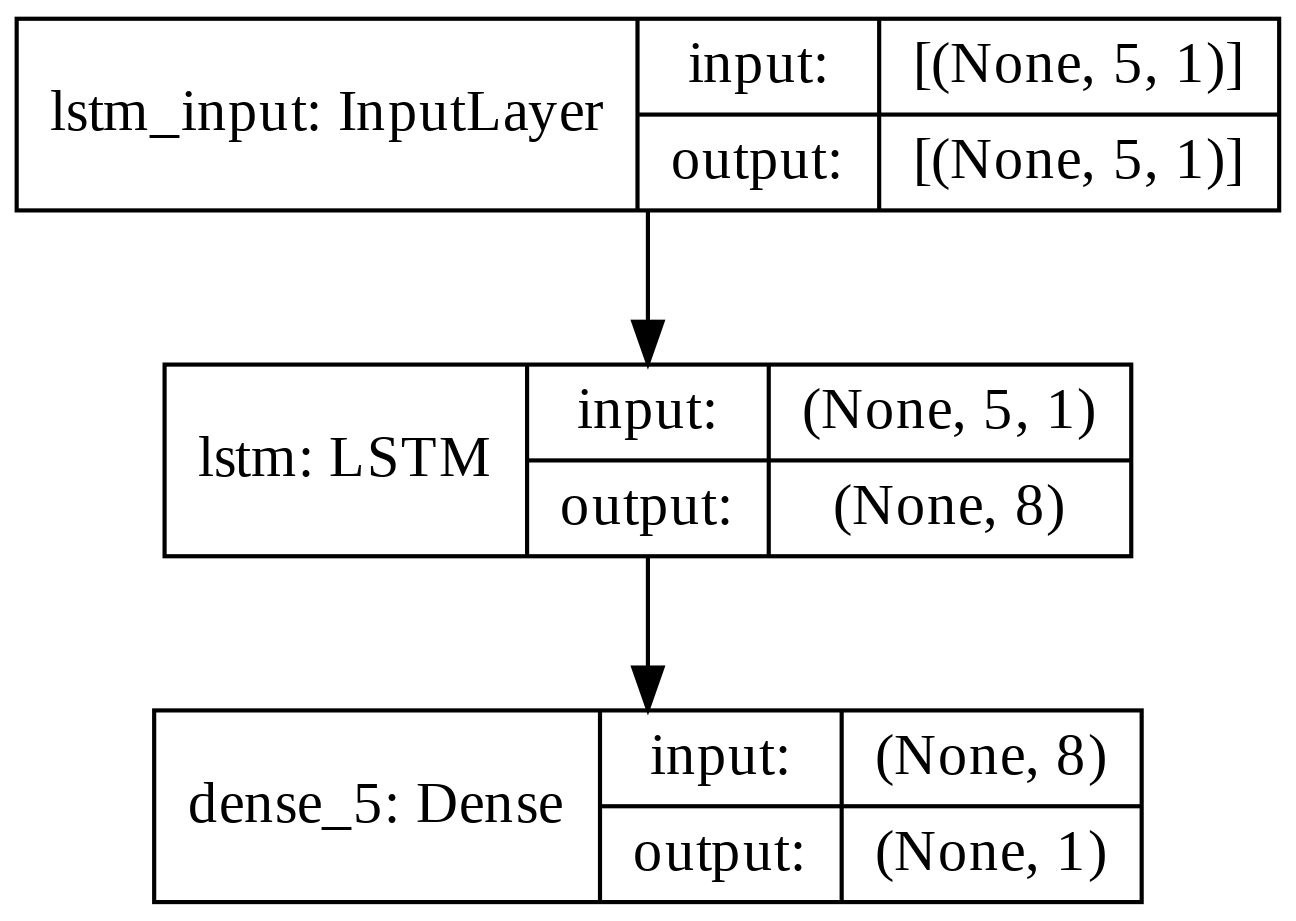

In [ ]:
lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(8, input_shape=(5, 1)))
lstm.add(keras.layers.Dense(1, activation = 'sigmoid'))
keras.utils.plot_model(lstm, to_file = './lstm_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate = 1e-4)
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)
lstm.compile(optimizer = rms, loss = 'binary_crossentropy', metrics = ['accuracy'])
lstm_history = lstm.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6806 - accuracy: 0.6966 - val_loss: 0.6640 - val_accuracy: 0.9663
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.9661 - val_loss: 0.6280 - val_accuracy: 0.9663
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.9661 - val_loss: 0.5871 - val_accuracy: 0.9663
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.9661 - val_loss: 0.5405 - val_accuracy: 0.9663
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.9661 - val_loss: 0.4879 - val_accuracy: 0.9663
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.9661 - val_loss: 0.4304 - val_accuracy: 0.9663
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.9661 - val_loss: 0.3693 - val_accuracy: 0.9663

#### GRU

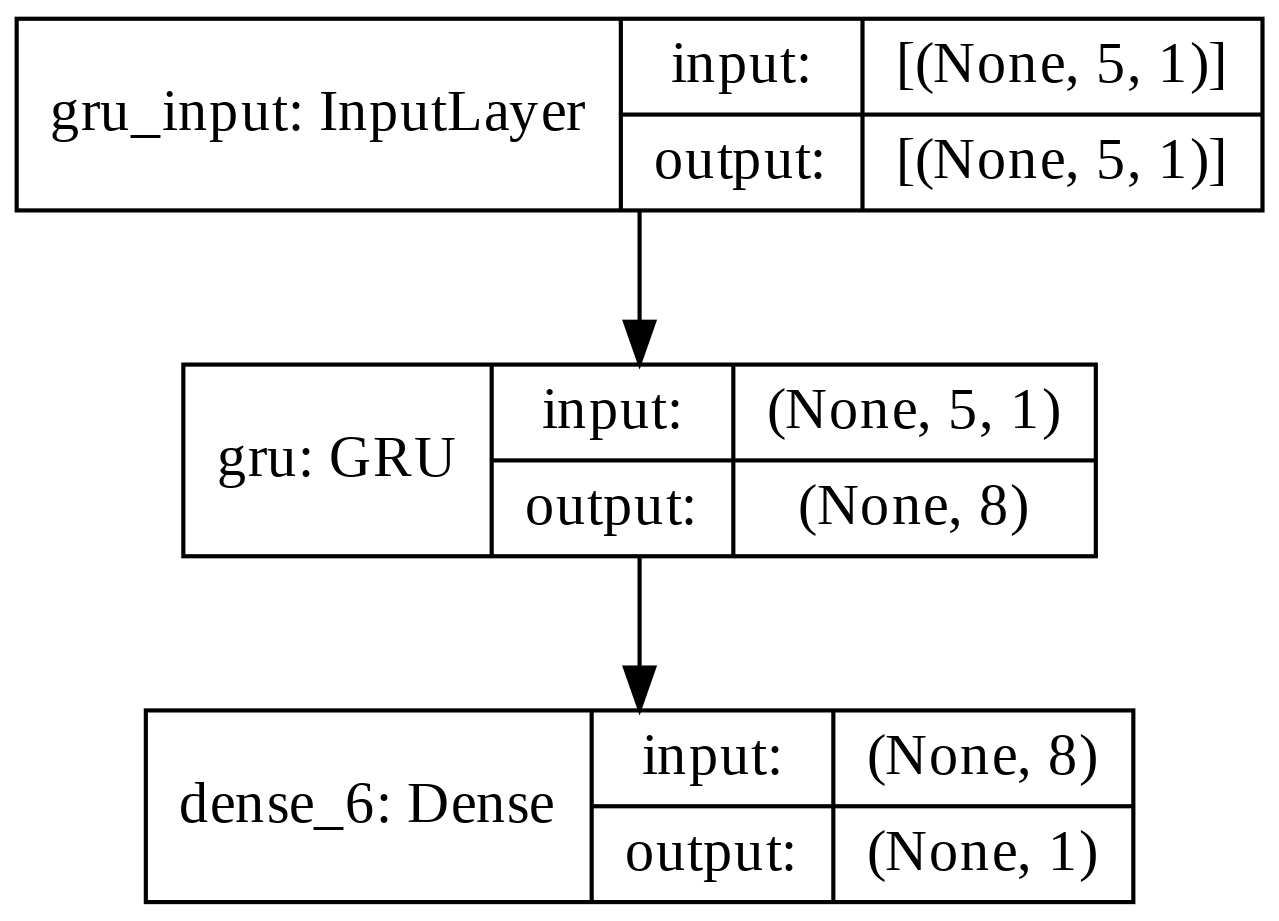

In [ ]:
gru = keras.Sequential()
gru.add(keras.layers.GRU(8, input_shape = (5, 1)))
gru.add(keras.layers.Dense(1, activation = 'sigmoid'))
keras.utils.plot_model(gru, to_file = './gru_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate=1e-4)
gru.compile(optimizer = rms, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
gru_history = gru.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.6557 - accuracy: 0.6923 - val_loss: 0.6281 - val_accuracy: 0.8263
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.9155 - val_loss: 0.5665 - val_accuracy: 0.9656
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.9656 - val_loss: 0.4999 - val_accuracy: 0.9663
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.9661 - val_loss: 0.4300 - val_accuracy: 0.9663
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.9661 - val_loss: 0.3596 - val_accuracy: 0.9663
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.9661 - val_loss: 0.2940 - val_accuracy: 0.9663
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9661 - val_loss: 0.2372 - val_accuracy: 0.9663

### Visualize the result

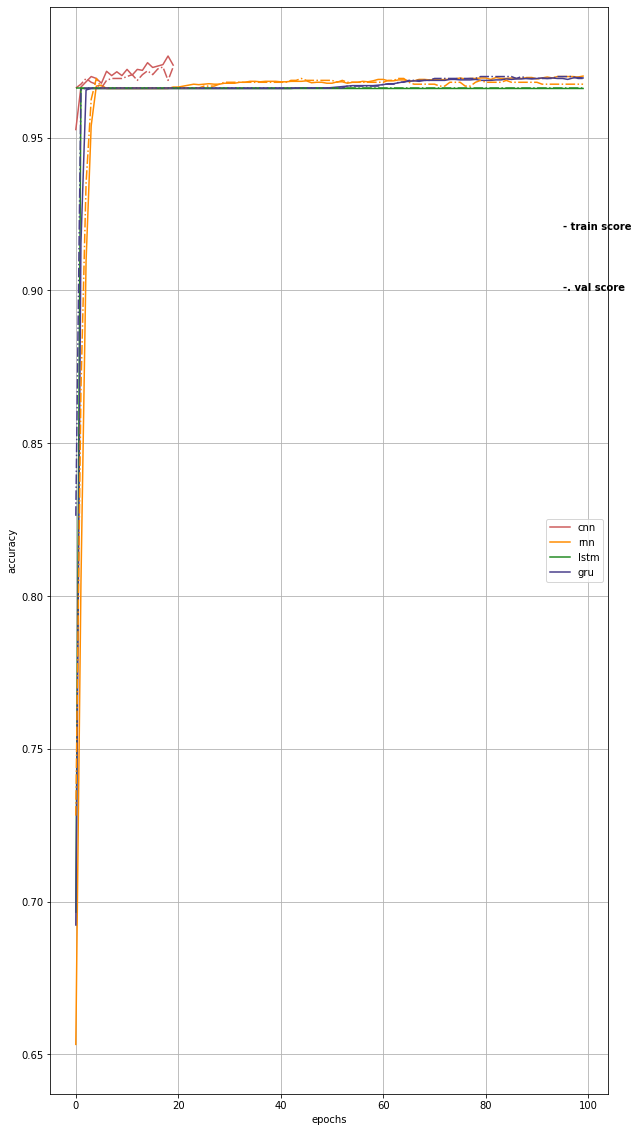

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 20))
color_map = ('indianred', 'darkorange', 'forestgreen', 'darkslateblue')
plt.plot(history.history['accuracy'], color = color_map[0], label = 'cnn')
plt.plot(rnn_history.history['accuracy'], color = color_map[1], label = 'rnn')
plt.plot(lstm_history.history['accuracy'], color = color_map[2], label = 'lstm')
plt.plot(gru_history.history['accuracy'], color = color_map[3], label = 'gru')
plt.plot(history.history['val_accuracy'], color = color_map[0], linestyle = "-.")
plt.plot(rnn_history.history['val_accuracy'], color = color_map[1], linestyle = "-.")
plt.plot(lstm_history.history['val_accuracy'], color = color_map[2], linestyle = "-.")
plt.plot(gru_history.history['val_accuracy'], color = color_map[3], linestyle = "-.")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.text(95, 0.92, '- train score', fontweight = 'bold')
plt.text(95, 0.90, '-. val score', fontweight = 'bold')
plt.legend(loc = 'center right')
plt.savefig('./ai4i2020_result.png')
plt.grid(True)
plt.show()

In [ ]:
import statistics

print('\tCNN \t RNN \t LSTM \t GRU')
print('train:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} '.format(statistics.mean(history.history['accuracy']), statistics.mean(rnn_history.history['accuracy']), statistics.mean(lstm_history.history['accuracy']), statistics.mean(gru_history.history['accuracy'])))
print('val:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} '.format(statistics.mean(history.history['val_accuracy']), statistics.mean(rnn_history.history['val_accuracy']), statistics.mean(lstm_history.history['val_accuracy']), statistics.mean(gru_history.history['val_accuracy'])))

	CNN 	 RNN 	 LSTM 	 GRU
train:	0.971	0.963	0.963	0.964 
val:	0.970	0.964	0.966	0.966 


In [ ]:
history.history

{'accuracy': [0.9526562690734863,
  0.9665625095367432,
  0.9682812690734863,
  0.9700000286102295,
  0.9693750143051147,
  0.9678124785423279,
  0.9717187285423279,
  0.9703124761581421,
  0.9715625047683716,
  0.9703124761581421,
  0.9723437428474426,
  0.9704687595367432,
  0.9723437428474426,
  0.9720312356948853,
  0.9745312333106995,
  0.9729687571525574,
  0.973437488079071,
  0.9739062786102295,
  0.9767187237739563,
  0.9737499952316284],
 'loss': [0.22857463359832764,
  0.1307757943868637,
  0.10878783464431763,
  0.1011011153459549,
  0.10013242810964584,
  0.09632754325866699,
  0.09346646070480347,
  0.09348884224891663,
  0.09160154312849045,
  0.08936922997236252,
  0.08719012886285782,
  0.08458214998245239,
  0.08329441398382187,
  0.08267960697412491,
  0.07950806617736816,
  0.07896892726421356,
  0.07687374204397202,
  0.07544774562120438,
  0.07190275192260742,
  0.0741945281624794],
 'val_accuracy': [0.9662500023841858,
  0.9674999713897705,
  0.9693750143051147,


## Multiclass Classification


### Extract features and class
- features: Air temperature, Process temeprature, Rotatoinial speed, Torque, Tool wear
- class: TWF, HDF, PWF, OSF, RNF(detailed machine failure )

In [ ]:
target_arr = ai4i_arr[:, ai4i_col['TWF']:]
print(input_arr.shape, target_arr.shape)

(10000, 5) (10000, 5)


In [ ]:
target_arr.shape[0]

10000

### Apply Priority Encoder to targets
- tensorflow's target should be 1 dim [ref](https://stackoverflow.com/questions/49083984/valueerror-can-not-squeeze-dim1-expected-a-dimension-of-1-got-3-for-sparse)
    - change one hot encoded target to int
    - ex. [0 0 1 0] -> 3
    - work as priority encoder
    - ex. [0 0 1 1] -> 3 (not 3.5 or 4)
    - change target shape (10000, 5) -> (10000)
    - 0: no failure
    - 1: TWF 
    - 2: HDF
    - 3: PWF
    - 4: OSF
    - 5: RNF
    - total 6 classes to recognize

In [ ]:
target_int = []
one_hot = 0
for x in target_arr:
    for i in range(len(target_arr[0])):
        # failure situation
        if(x[i] == 1):
            target_int.append(i + 1)
            one_hot = 1
            break # priority encoder
    # normal situation
    if(one_hot == 0):
        target_int.append(0)
    one_hot = 0
        
target_int = np.array(target_int, dtype = np.int)

In [ ]:
print(len(target_int))

10000


In [ ]:
print(target_int[:100])
print(target_arr[:100, :])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0

### Normalization the data
- features are not changed and already normalized in binary classification

### Split train data and test data

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(input_arr, target_int, test_size = 0.2)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [ ]:
print(train_target.sum(), test_target.sum())
print(train_target)

750 201
[0 0 0 ... 0 4 0]


In [ ]:
train_input = np.array(train_input, dtype = np.float32)
train_target = np.array(train_target, dtype = np.int)
test_input = np.array(test_input, dtype = np.float32)
test_target = np.array(test_target, dtype = np.int)
train_input = train_input.reshape(-1, 5, 1) # reshape input to 3 dim


### Split train data and validation data

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)
print(train_input.shape, val_input.shape, train_target.shape, val_target.shape)


(6400, 5, 1) (1600, 5, 1) (6400,) (1600,)


### Training model

#### CNN

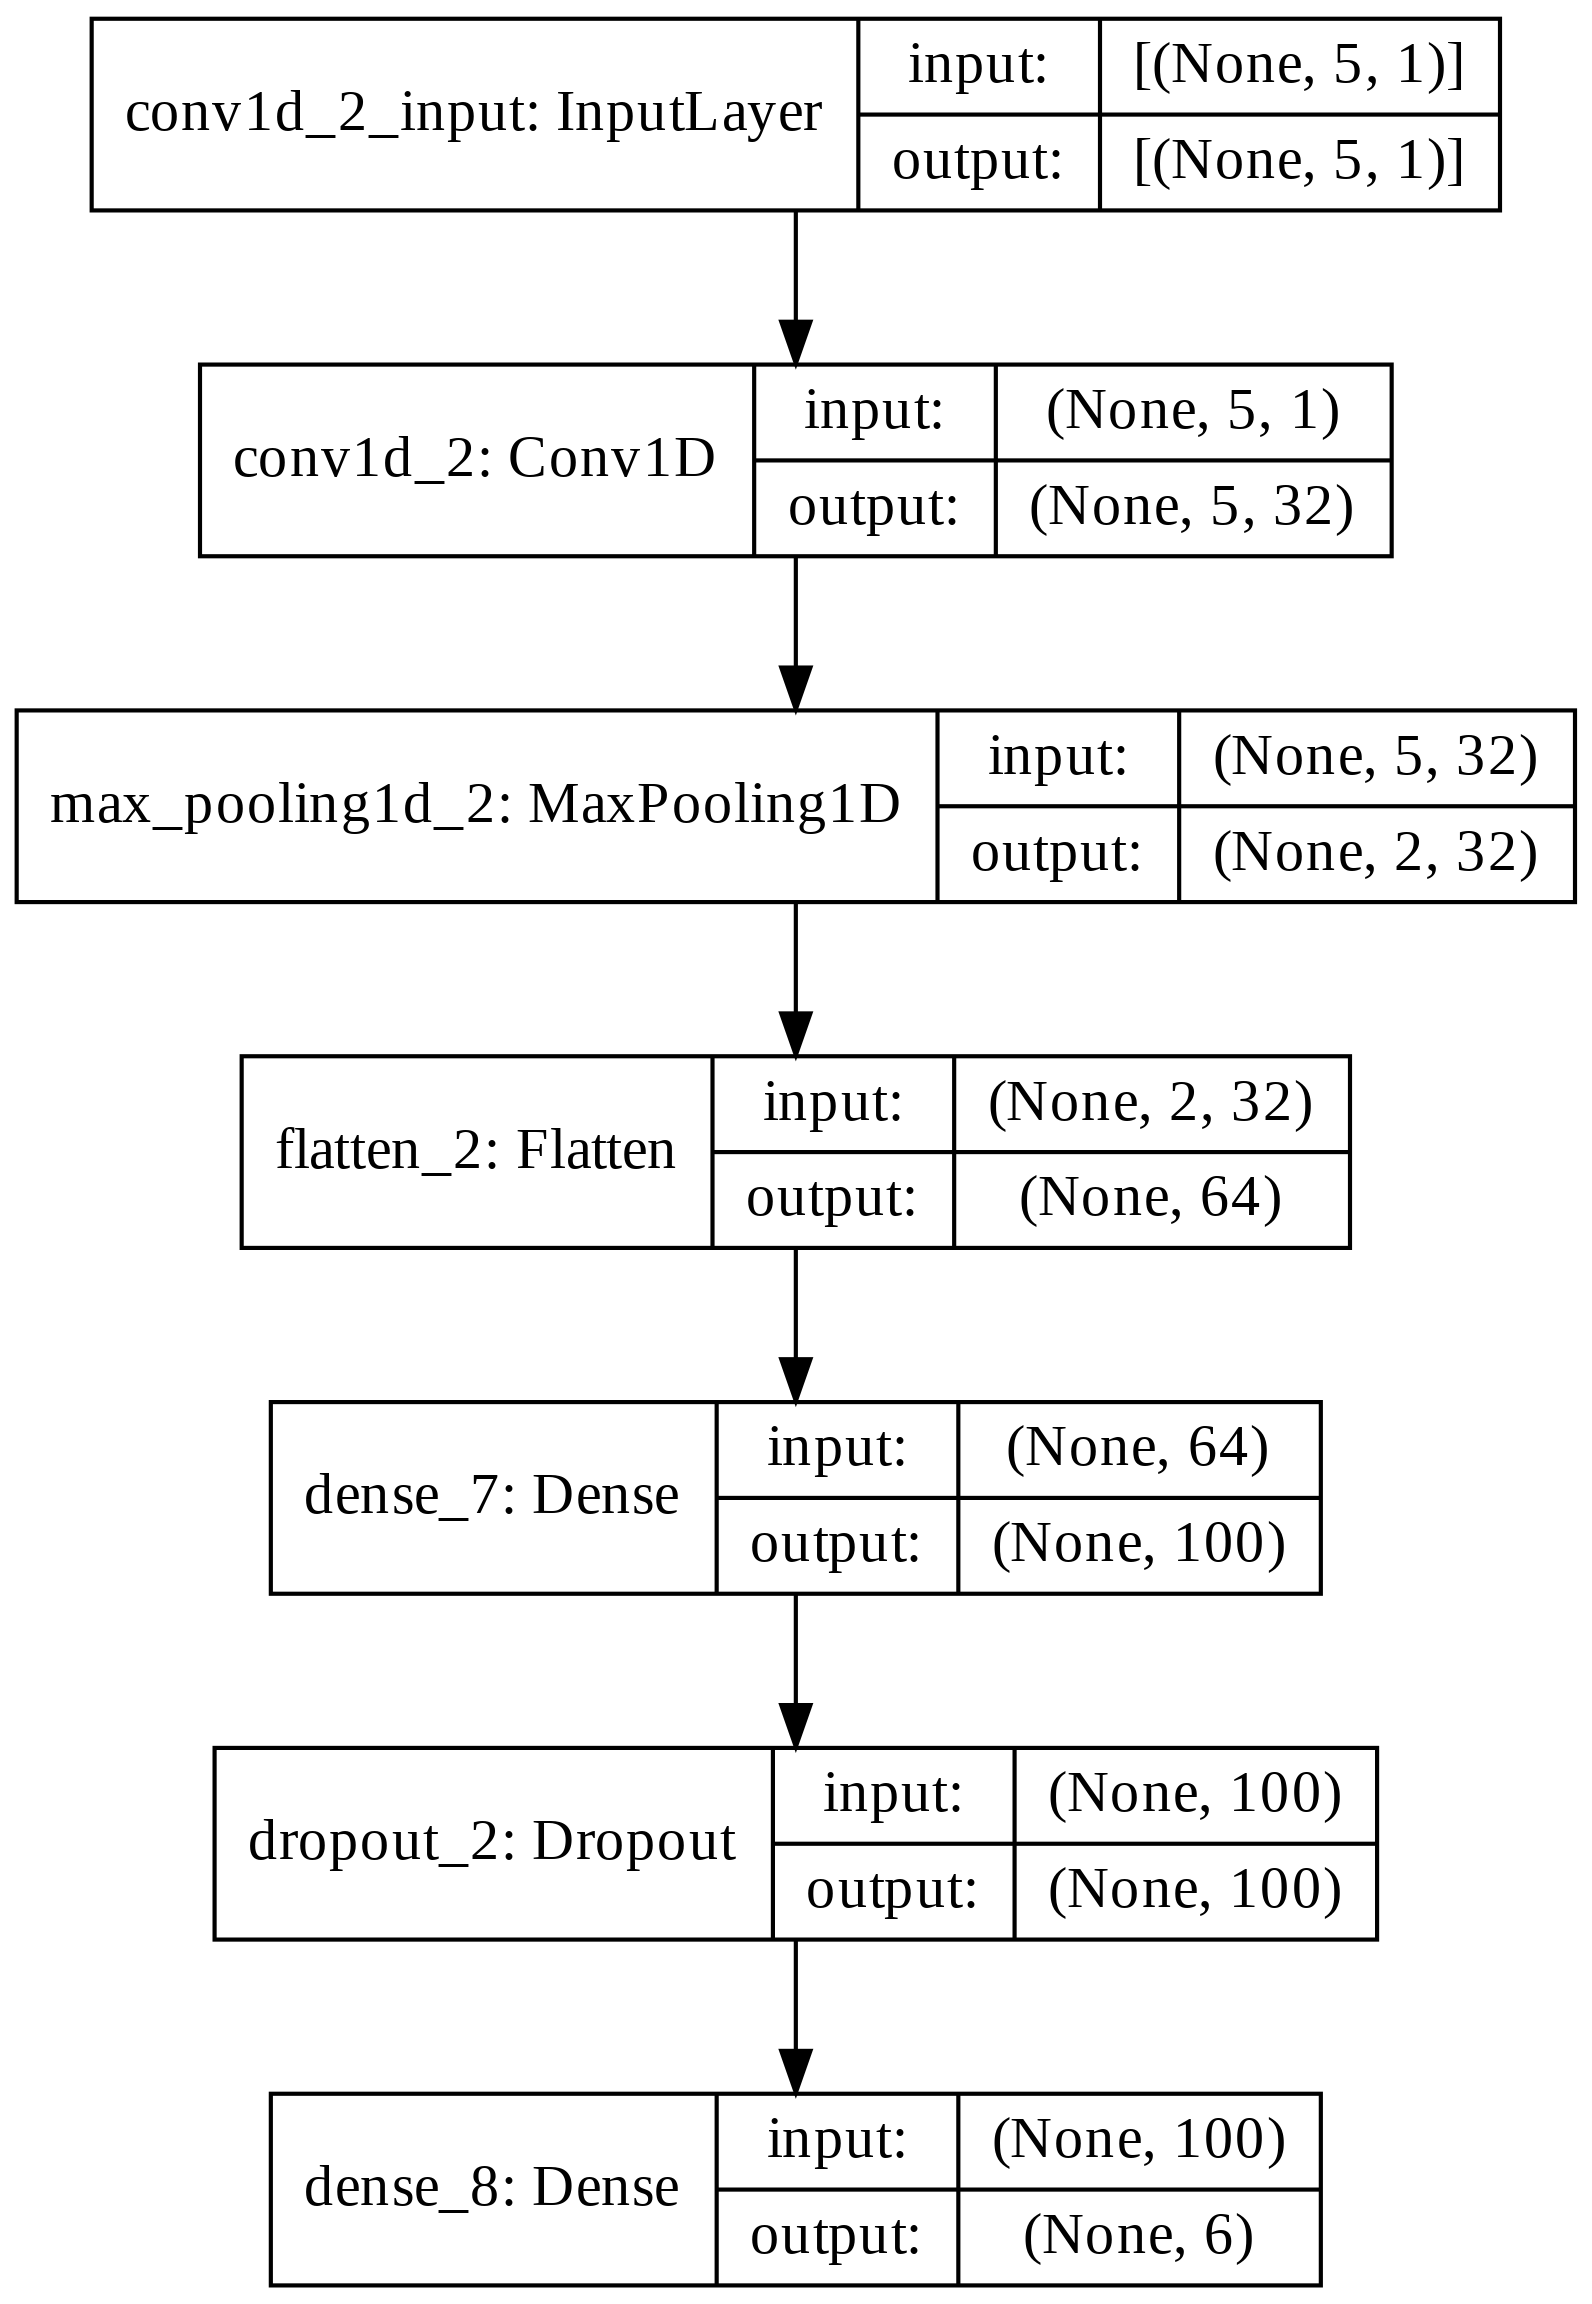

In [ ]:
cnn_m = keras.Sequential()
cnn_m.add(keras.layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (5, 1)))
cnn_m.add(keras.layers.MaxPooling1D(2))
cnn_m.add(keras.layers.Flatten())
cnn_m.add(keras.layers.Dense(100, activation = 'relu'))
cnn_m.add(keras.layers.Dropout(0.4))
cnn_m.add(keras.layers.Dense(6, activation = 'softmax')) # total 6 classes to recognize
keras.utils.plot_model(cnn_m, to_file = './cnn_m_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
cnn_m.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 5, 32)             128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 606       
Total params: 7,234
Trainable params: 7,234
Non-trainable params: 0
____________________________________________________

In [ ]:
# one hot encoded input -> categorical
# priority encoded input -> sparse categorical
# binary classification -> binary crossentropy
cnn_m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') # input is normalized float -> sparse
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_cnn_m_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
cnn_m_history = cnn_m.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3916 - accuracy: 0.9559 - val_loss: 0.2028 - val_accuracy: 0.9675
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9656 - val_loss: 0.1350 - val_accuracy: 0.9706
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9666 - val_loss: 0.1228 - val_accuracy: 0.9700
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9677 - val_loss: 0.1137 - val_accuracy: 0.9719
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9680 - val_loss: 0.1020 - val_accuracy: 0.9725
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9692 - val_loss: 0.0968 - val_accuracy: 0.9731
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9698 - val_loss: 0.0936 - val_accuracy: 0.9712

#### RNN

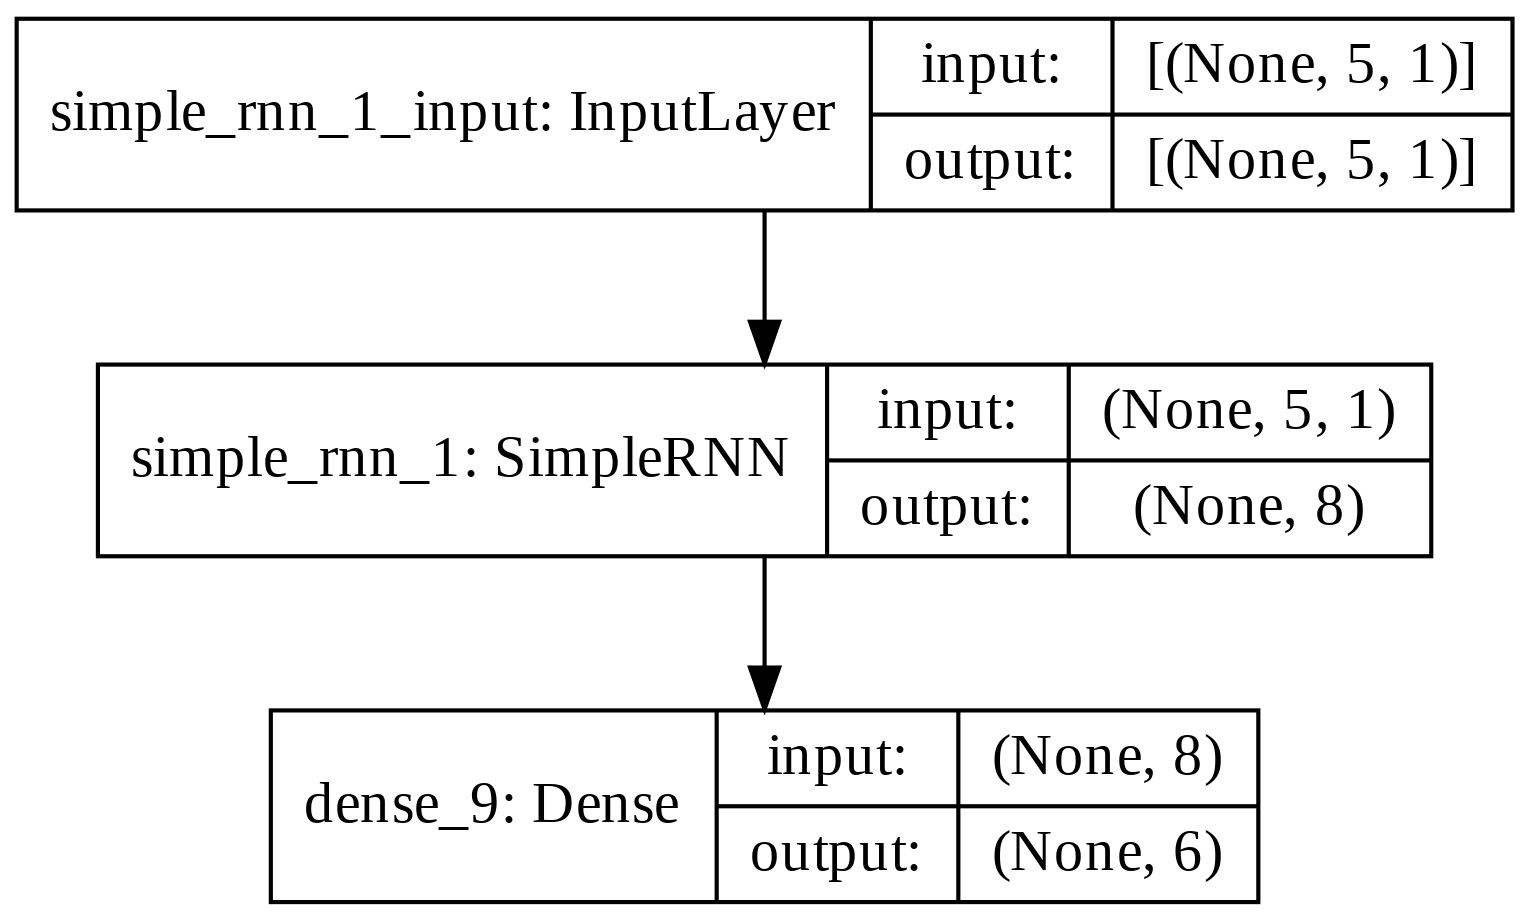

In [ ]:
rnn_m = keras.Sequential()
rnn_m.add(keras.layers.SimpleRNN(8, input_shape = (5, 1)))
rnn_m.add(keras.layers.Dense(6, activation = 'softmax')) # total 6 classes to recognize
keras.utils.plot_model(rnn_m, to_file = './rnn_m_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate = 1e-4)
rnn_m.compile(optimizer = rms, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_m_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
rnn_m_history = rnn_m.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 1.8340 - accuracy: 0.2177 - val_loss: 1.7864 - val_accuracy: 0.2544
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.7021 - accuracy: 0.3148 - val_loss: 1.6347 - val_accuracy: 0.3744
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.5300 - accuracy: 0.4667 - val_loss: 1.4410 - val_accuracy: 0.5462
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.3213 - accuracy: 0.6998 - val_loss: 1.2168 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0933 - accuracy: 0.8811 - val_loss: 0.9834 - val_accuracy: 0.9331
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.9567 - val_loss: 0.7584 - val_accuracy: 0.9675
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.9658 - val_loss: 0.5576 - val_accuracy: 0.9675

#### LSTM

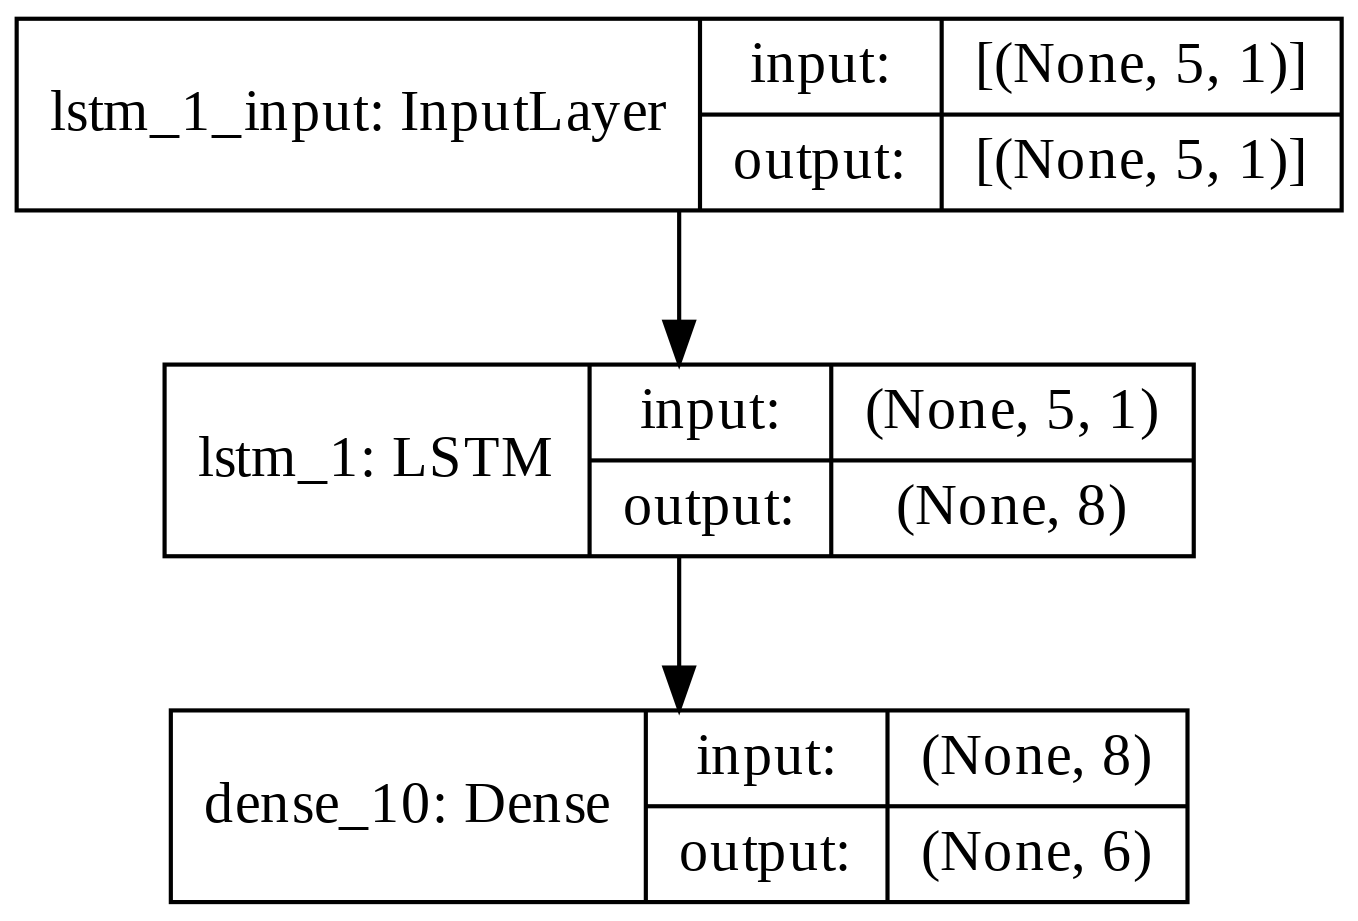

In [ ]:
lstm_m = keras.Sequential()
lstm_m.add(keras.layers.LSTM(8, input_shape = (5, 1)))
lstm_m.add(keras.layers.Dense(6, activation = 'softmax')) # total 6 classes to recognize
keras.utils.plot_model(lstm_m, to_file = './lstm_m_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate = 1e-4)
lstm_m.compile(optimizer = rms, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_m_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
lstm_m_history = lstm_m.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 1.7139 - accuracy: 0.6892 - val_loss: 1.6658 - val_accuracy: 0.9275
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.6169 - accuracy: 0.9609 - val_loss: 1.5617 - val_accuracy: 0.9675
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.5040 - accuracy: 0.9658 - val_loss: 1.4383 - val_accuracy: 0.9675
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.3704 - accuracy: 0.9658 - val_loss: 1.2927 - val_accuracy: 0.9675
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.2145 - accuracy: 0.9658 - val_loss: 1.1243 - val_accuracy: 0.9675
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0370 - accuracy: 0.9658 - val_loss: 0.9365 - val_accuracy: 0.9675
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.8441 - accuracy: 0.9658 - val_loss: 0.7397 - val_accuracy: 0.9675

#### GRU

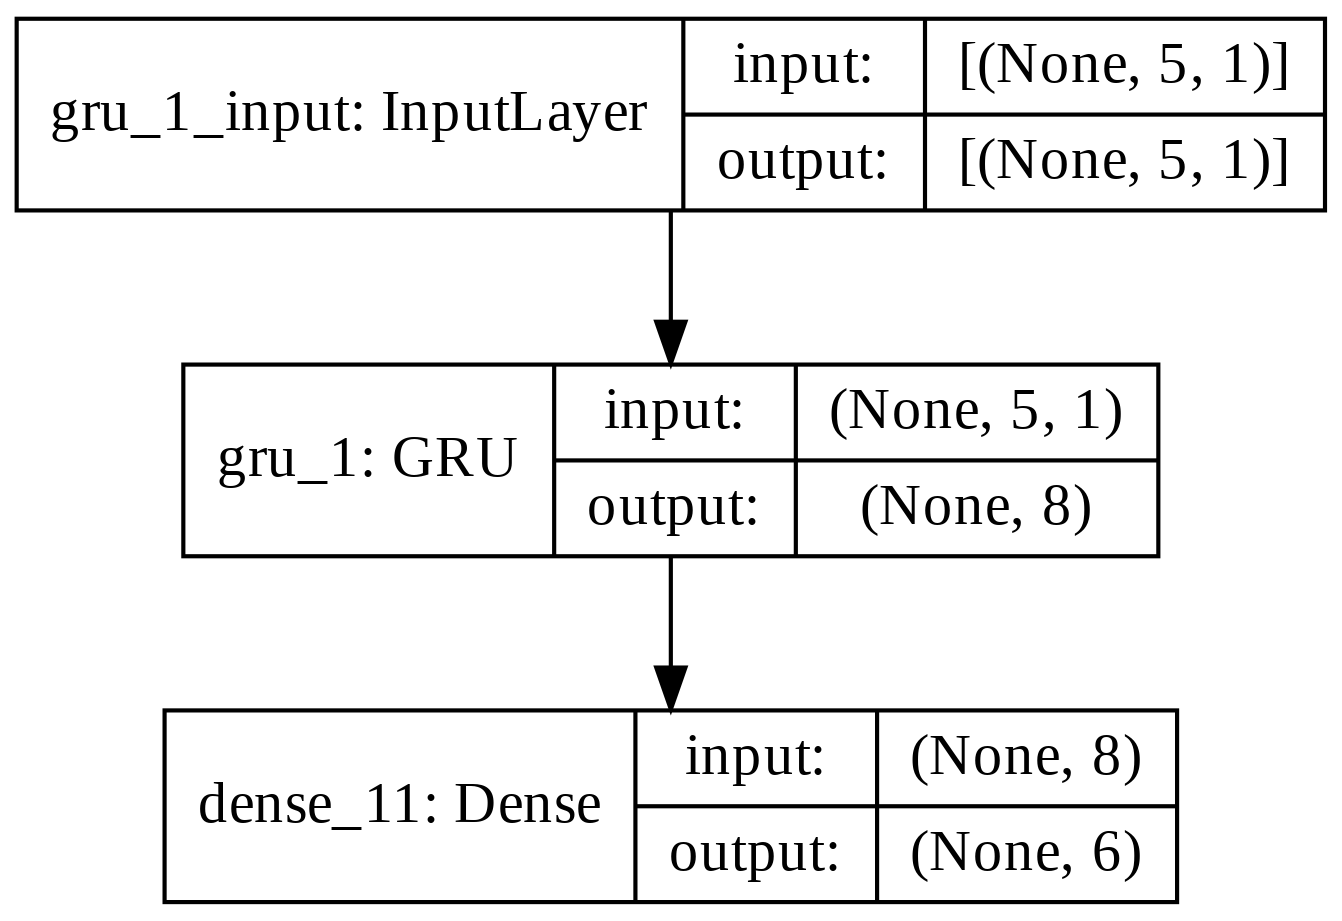

In [ ]:
gru_m = keras.Sequential()
gru_m.add(keras.layers.GRU(8, input_shape = (5, 1)))
gru_m.add(keras.layers.Dense(6, activation = 'softmax')) # total 6 classes to recognize
keras.utils.plot_model(gru_m, to_file = './gru_m_architecture.png', show_shapes = True, dpi = 300)

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate = 1e-4)
gru_m.compile(optimizer = rms, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_gru_m_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
gru_m_history = gru_m.fit(train_input, train_target, epochs = 100, validation_data = (val_input, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 1.7204 - accuracy: 0.5892 - val_loss: 1.6767 - val_accuracy: 0.6569
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.6169 - accuracy: 0.7550 - val_loss: 1.5618 - val_accuracy: 0.8375
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.4891 - accuracy: 0.9033 - val_loss: 1.4207 - val_accuracy: 0.9488
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 1.3342 - accuracy: 0.9617 - val_loss: 1.2518 - val_accuracy: 0.9675
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.1519 - accuracy: 0.9658 - val_loss: 1.0562 - val_accuracy: 0.9675
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.9658 - val_loss: 0.8416 - val_accuracy: 0.9675
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9658 - val_loss: 0.6262 - val_accuracy: 0.9675

### Visualize the result

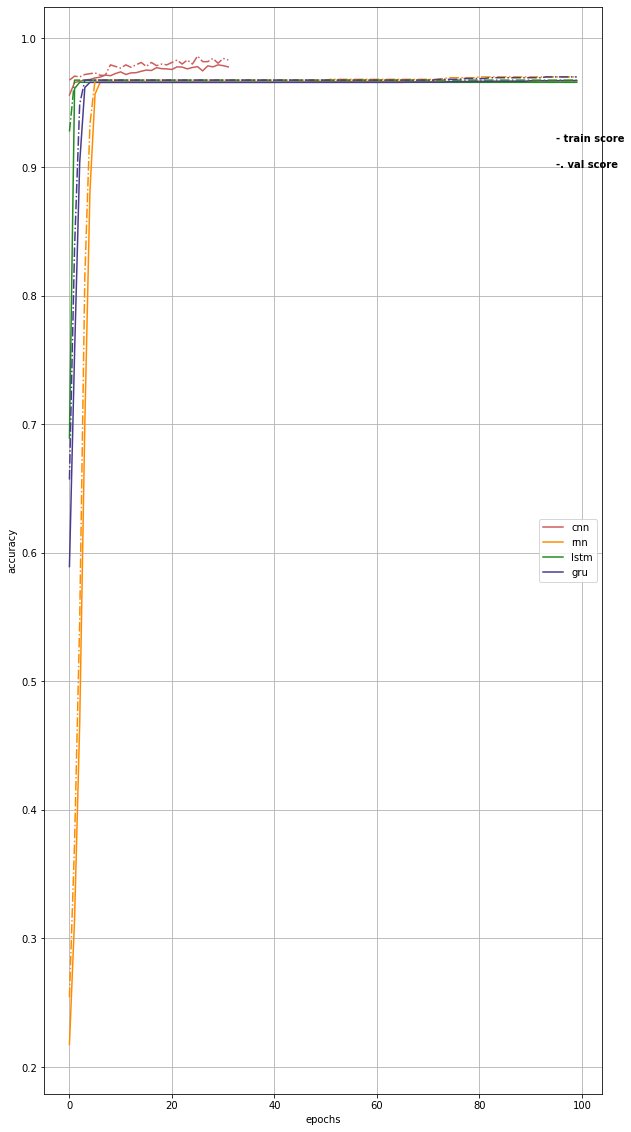

In [ ]:
plt.figure(figsize = (10, 20))
plt.plot(cnn_m_history.history['accuracy'], color = color_map[0], label = 'cnn')
plt.plot(rnn_m_history.history['accuracy'], color = color_map[1], label = 'rnn')
plt.plot(lstm_m_history.history['accuracy'], color = color_map[2], label = 'lstm')
plt.plot(gru_m_history.history['accuracy'], color = color_map[3], label = 'gru')
plt.plot(cnn_m_history.history['val_accuracy'], color = color_map[0], linestyle = "-.")
plt.plot(rnn_m_history.history['val_accuracy'], color = color_map[1], linestyle = "-.")
plt.plot(lstm_m_history.history['val_accuracy'], color = color_map[2], linestyle = "-.")
plt.plot(gru_m_history.history['val_accuracy'], color = color_map[3], linestyle = "-.")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.text(95, 0.92, '- train score', fontweight = 'bold')
plt.text(95, 0.90, '-. val score', fontweight = 'bold')
plt.legend(loc = 'center right')
plt.savefig('./ai4i2020_multi_classify_result.png')
plt.grid(True)
plt.show()

In [ ]:
print('\tCNN \t RNN \t LSTM \t GRU \t Soft Voting')
print('train:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} '.format(statistics.mean(cnn_m_history.history['accuracy']), statistics.mean(rnn_m_history.history['accuracy']), statistics.mean(lstm_m_history.history['accuracy']), statistics.mean(gru_m_history.history['accuracy'])))
print('val:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} '.format(statistics.mean(cnn_m_history.history['val_accuracy']), statistics.mean(rnn_m_history.history['val_accuracy']), statistics.mean(lstm_m_history.history['val_accuracy']), statistics.mean(gru_m_history.history['val_accuracy'])))

	CNN 	 RNN 	 LSTM 	 GRU 	 Soft Voting
train:	0.974	0.944	0.963	0.959 
val:	0.978	0.949	0.967	0.963 


In [ ]:
infile = open('ai4i_result.tsv', 'w')
infile.write('\tCNN \t RNN \t LSTM \t GRU \t Soft Voting\n')
infile.write('binary_train:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\n'.format(statistics.mean(history.history['accuracy']), statistics.mean(rnn_history.history['accuracy']), statistics.mean(lstm_history.history['accuracy']), statistics.mean(gru_history.history['accuracy'])))
infile.write('binary_val:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\n'.format(statistics.mean(history.history['val_accuracy']), statistics.mean(rnn_history.history['val_accuracy']), statistics.mean(lstm_history.history['val_accuracy']), statistics.mean(gru_history.history['val_accuracy'])))
infile.write('multi_train:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\n'.format(statistics.mean(cnn_m_history.history['accuracy']), statistics.mean(rnn_m_history.history['accuracy']), statistics.mean(lstm_m_history.history['accuracy']), statistics.mean(gru_m_history.history['accuracy'])))
infile.write('multi_val:\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\n'.format(statistics.mean(cnn_m_history.history['val_accuracy']), statistics.mean(rnn_m_history.history['val_accuracy']), statistics.mean(lstm_m_history.history['val_accuracy']), statistics.mean(gru_m_history.history['val_accuracy'])))
infile.close()